In [5]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

In [15]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print("min", np.min(x_train), "max", np.max(x_train))

(60000, 784)
(10000, 784)
min 0.0 max 1.0


## Tasks

- Implement a simple autoencoder with one hidden layer. Hence, the size of the layers should match (784, 32, 784). Feel free to alter the value of 32.

Who can get the lowest validation score?

In [24]:
n_inputs = 784

# Create the model
model = Sequential()
model.add(Dense(32, input_dim=n_inputs, bias_initializer='glorot_uniform', activation='relu'))
model.add(Dense(n_inputs, bias_initializer='glorot_uniform', activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adadelta')

In [25]:
# NBVAL_SKIP
# Fit the model (Go grab a coffee, this will take a while!)
model.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.3663 - val_loss: 0.2710
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2628 - val_loss: 0.2515
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2414 - val_loss: 0.2292
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2216 - val_loss: 0.2117
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2068 - val_loss: 0.1992
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.1959 - val_loss: 0.1898
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1874 - val_loss: 0.1822
Epoch 8/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1804 - val_loss: 0.1756
Epoch 9/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1742 - val_loss: 0.1699
Epoch

In [26]:
# NBVAL_SKIP
# Using the validation set, run through the autoencoder
# (i.e. encode then decode)
decoded_imgs = model.predict(x_test)

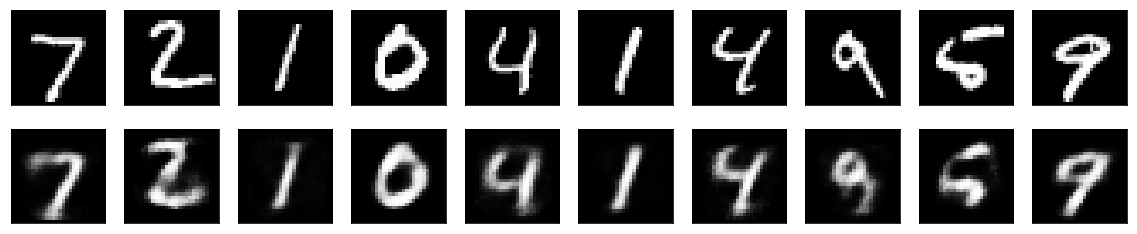

In [27]:
# NBVAL_SKIP
# Plot the results
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Tasks

- Can you improve the result? Things to try:
    - More epochs
    - More layers
    - Different initialisations
    - Different scoring methods
    - Different activations